In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [201]:
import pandas as pd
import helpers.data_mining_helpers as dmh
import numpy as np

### 2. Data Preparation

In [103]:
f=open(r'D:\資料\data mininng\sentiment labelled sentences\yelp_labelled.txt','r')
f1=open(r'D:\資料\data mininng\sentiment labelled sentences\imdb_labelled.txt','r',encoding="utf-8")
f2=open(r'D:\資料\data mininng\sentiment labelled sentences\amazon_cells_labelled.txt','r')

In [104]:
data=[]
for line in f.readlines():
    data.append([line.replace('\t',"").replace('\n',"")[:-1],line.replace('\t',"").replace('\n',"")[-1]])
for line in f1.readlines():
    data.append([line.replace('\t',"").replace('\n',"")[:-1],line.replace('\t',"").replace('\n',"")[-1]]) 
for line in f2.readlines():
    data.append([line.replace('\t',"").replace('\n',"")[:-1],line.replace('\t',"").replace('\n',"")[-1]])    

In [105]:
categories = ['negative', 'positive']
new_data=[]
for i in data:
    new_data.append([i[0],i[1],categories[int(i[1])]])

In [109]:
new_data=pd.DataFrame(new_data)


In [110]:
new_data.columns=["text","score","category"]

In [111]:
new_data

,text,score,category
0,Wow... Loved this place.,1,positive
1,Crust is not good.,0,negative
2,Not tasty and the texture was just nasty.,0,negative
3,Stopped by during the late May bank holiday of...,1,positive
4,The selection on the menu was great and so wer...,1,positive
...,...,...,...
2995,The screen does get smudged easily because it ...,0,negative
2996,What a piece of junk.. I lose more calls on th...,0,negative
2997,Item Does Not Match Picture.,0,negative
2998,The only thing that disappoint me is the infra...,0,negative


In [112]:
new_data.score

0       1
1       0
2       0
3       1
4       1
       ..
2995    0
2996    0
2997    0
2998    0
2999    0
Name: score, Length: 3000, dtype: object

In [115]:
new_data.text[0]

'Wow... Loved this place.'

In [116]:
new_data.category[0]

'positive'

In [117]:
new_data.score[:10]

0    1
1    0
2    0
3    1
4    1
5    0
6    0
7    0
8    1
9    1
Name: score, dtype: object

### 3. Data Transformation

In [118]:
X=new_data

In [127]:
X["add_column"]=X.score.apply(lambda t:categories[int(t)])

In [128]:
X

,text,score,category,add_column
0,Wow... Loved this place.,1,positive,positive
1,Crust is not good.,0,negative,negative
2,Not tasty and the texture was just nasty.,0,negative,negative
3,Stopped by during the late May bank holiday of...,1,positive,positive
4,The selection on the menu was great and so wer...,1,positive,positive
...,...,...,...,...
2995,The screen does get smudged easily because it ...,0,negative,negative
2996,What a piece of junk.. I lose more calls on th...,0,negative,negative
2997,Item Does Not Match Picture.,0,negative,negative
2998,The only thing that disappoint me is the infra...,0,negative,negative


In [138]:
X.drop(["add_column"],axis=1,inplace=True)

In [130]:
X[:10][["text","category"]]

,text,category
0,Wow... Loved this place.,positive
1,Crust is not good.,negative
2,Not tasty and the texture was just nasty.,negative
3,Stopped by during the late May bank holiday of...,positive
4,The selection on the menu was great and so wer...,positive
5,Now I am getting angry and I want my damn pho.,negative
6,Honeslty it didn't taste THAT fresh.),negative
7,The potatoes were like rubber and you could te...,negative
8,The fries were great too.,positive
9,A great touch.,positive


In [131]:
X[-10:]

,text,score,category,add_column
2990,I'm really disappointed all I have now is a ch...,0,negative,negative
2991,Painful on the ear.,0,negative,negative
2992,Lasted one day and then blew up.,0,negative,negative
2993,disappointed.,0,negative,negative
2994,Kind of flops around.,0,negative,negative
2995,The screen does get smudged easily because it ...,0,negative,negative
2996,What a piece of junk.. I lose more calls on th...,0,negative,negative
2997,Item Does Not Match Picture.,0,negative,negative
2998,The only thing that disappoint me is the infra...,0,negative,negative
2999,"You can not answer calls with the unit, never ...",0,negative,negative


In [132]:
X.loc[:10, 'text']

0                              Wow... Loved this place.
1                                    Crust is not good.
2             Not tasty and the texture was just nasty.
3     Stopped by during the late May bank holiday of...
4     The selection on the menu was great and so wer...
5        Now I am getting angry and I want my damn pho.
6                 Honeslty it didn't taste THAT fresh.)
7     The potatoes were like rubber and you could te...
8                             The fries were great too.
9                                        A great touch.
10                             Service was very prompt.
Name: text, dtype: object

In [133]:
X.iloc[:10, 0]

0                             Wow... Loved this place.
1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
8                            The fries were great too.
9                                       A great touch.
Name: text, dtype: object

### 4. Data Mining using Pandas

In [139]:
X.isnull()

,text,score,category
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2995,False,False,False
2996,False,False,False
2997,False,False,False
2998,False,False,False


In [140]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [148]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "score"])
dummy_series.to_frame().T

,text,score
0,dummy_record,1


In [149]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [152]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [153]:
dummy_dict = [{'text': 'dummy_record',
               'category': "positive"
              }]

In [154]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,1,0


In [155]:
X.dropna(inplace=True)

In [156]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,score,category
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [163]:
X["text"].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Name: text, Length: 3000, dtype: bool

In [164]:
sum(X["text"].duplicated())

17

In [167]:
X[X["text"].duplicated(keep=False)] ## I set keep=False that we can see all data which are duplicated  

,text,score,category
334,I love this place.,1,positive
380,I won't be back.,0,negative
383,The food was terrible.,0,negative
505,I would not recommend this place.,0,negative
814,I love this place.,1,positive
816,The food was terrible.,0,negative
843,I won't be back.,0,negative
846,I would not recommend this place.,0,negative
1090,Definitely worth checking out.,1,positive
1125,10/10,1,positive


In [168]:
X.drop_duplicates(keep="first", inplace=True)## I thinks i should keep the first data of those data which duplicated(not like lab that's an original data)

### 5. Data Preprocessing

In [169]:
X_sample = X.sample(n=1000)

In [171]:
len(X_sample)

1000

In [172]:
X_sample[0:4]

,text,score,category
2403,Very pleased with this headset.,1,positive
1379,Lucy Bell is so much higher than this crap and...,0,negative
475,"Third, the cheese on my friend's burger was cold.",0,negative
2201,All in all I think it was a good investment.,1,positive


In [173]:
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
print(X.category.value_counts())

negative    1493
positive    1490
Name: category, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

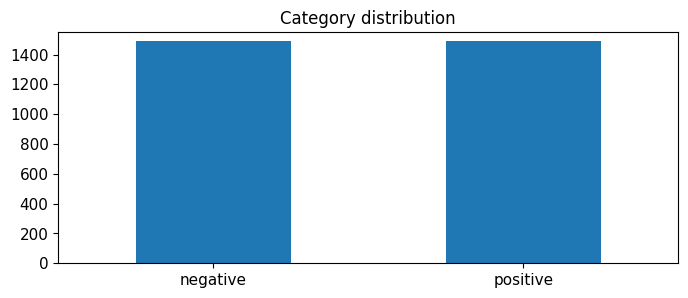

In [177]:
lim=max(X.category.value_counts())
lim=(lim//100+1.5)*100
X.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, lim],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

positive    509
negative    491
Name: category, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

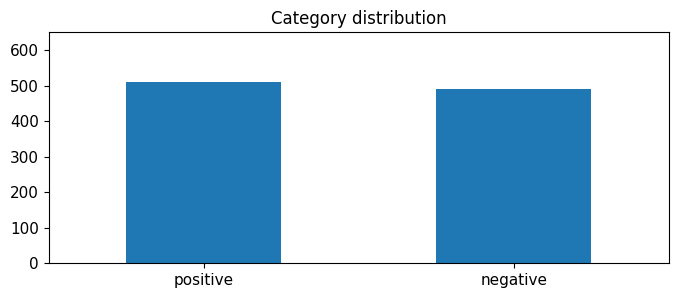

In [178]:
print(X_sample.category.value_counts())
lim=max(X_sample.category.value_counts())
lim=(lim//100+1.5)*100
X_sample.category.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, lim],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [179]:
import nltk

In [180]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [181]:
X[0:4]["unigrams"]

0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
Name: unigrams, dtype: object

In [182]:
X["unigrams"][0]

['Wow', '...', 'Loved', 'this', 'place', '.']

In [183]:
X[0:4]

,text,score,category,unigrams
0,Wow... Loved this place.,1,positive,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0,negative,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0,negative,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1,positive,"[Stopped, by, during, the, late, May, bank, ho..."


In [184]:
list(X[0:1]['unigrams'])

[['Wow', '...', 'Loved', 'this', 'place', '.']]

In [185]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 5112)	1
  (0, 2711)	1
  (0, 4558)	1
  (0, 3351)	1


In [186]:
X_counts.shape

(2983, 5155)

In [187]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [188]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [189]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [192]:
plot_z = X_counts[20:40, 20:40].toarray()

In [193]:
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [194]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[20:40]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[20:40]]

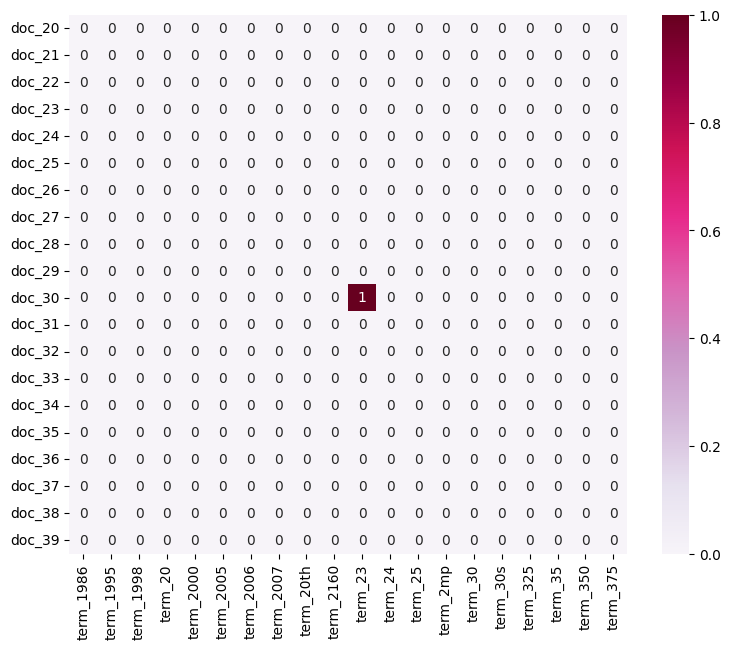

In [195]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [196]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2983, 2)

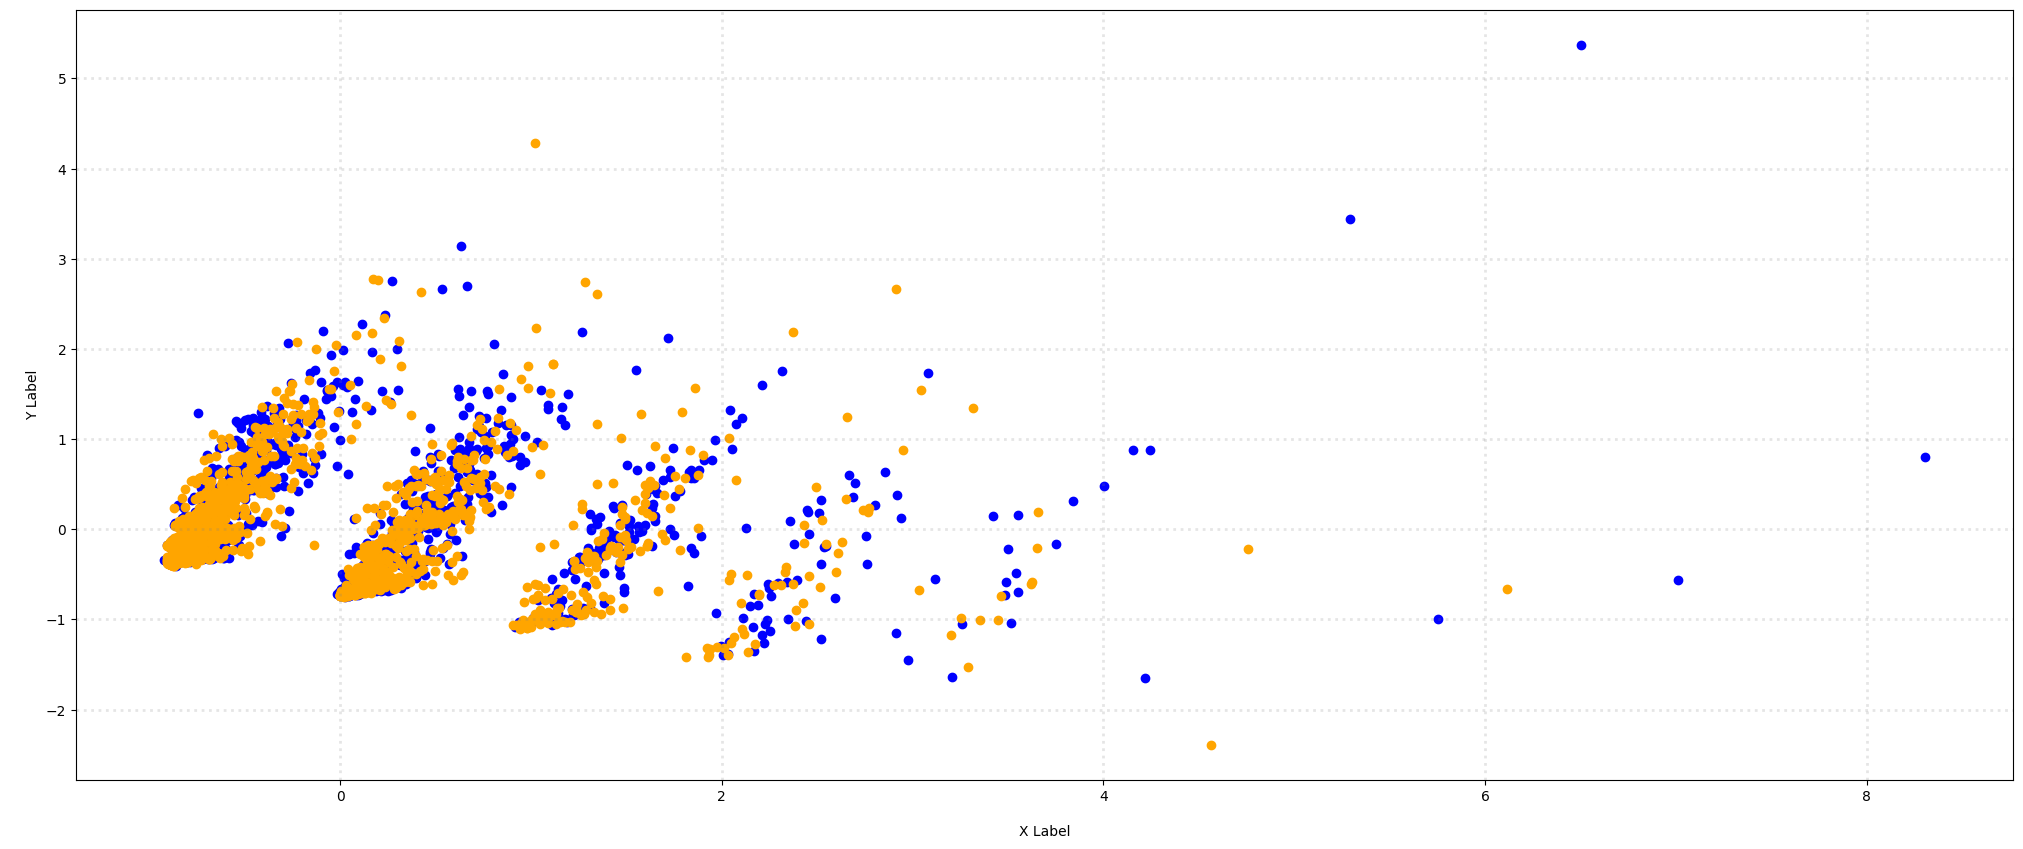

In [198]:
col = [ 'blue', 'orange']
categories=["positive","negative"]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category'] == category].T[0]
    ys = X_reduced[X['category'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [199]:
X_reduced

array([[-0.89241301, -0.17664223],
       [-0.74075281, -0.22084564],
       [ 0.39387002,  0.03193463],
       ...,
       [-0.8789698 , -0.34363388],
       [ 1.13472581, -0.87455635],
       [ 0.08438249, -0.61415401]])

In [202]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

1

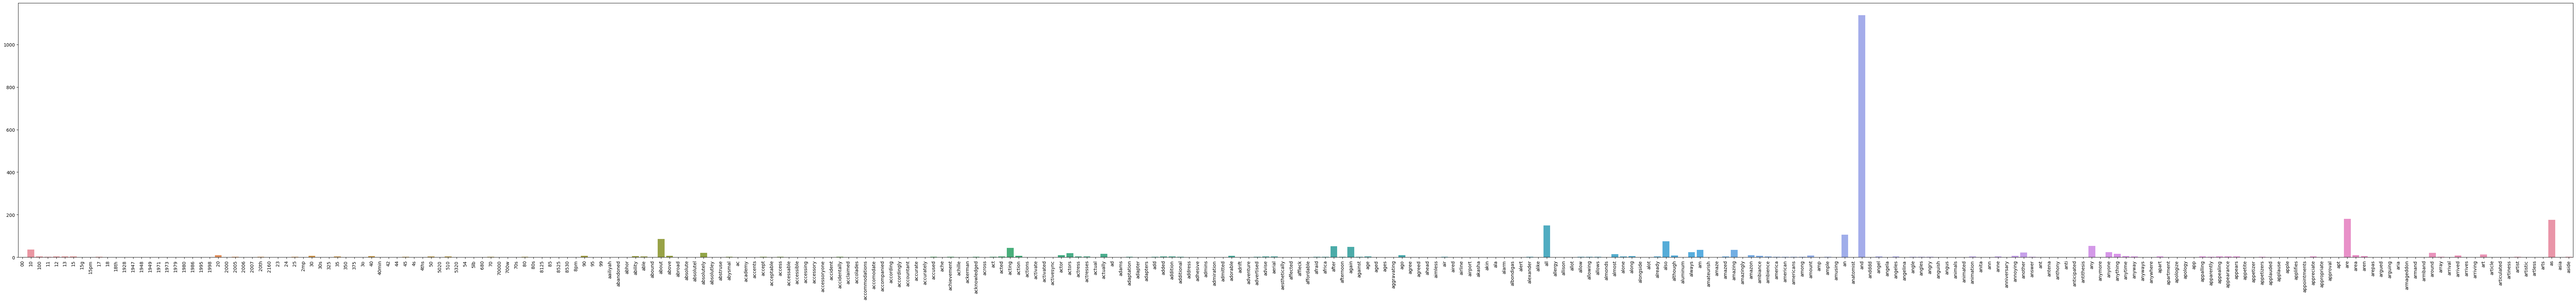

In [203]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [204]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

LabelBinarizer()

In [205]:
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

,text,score,category,unigrams,bin_category
0,Wow... Loved this place.,1,positive,"[Wow, ..., Loved, this, place, .]",[1]
1,Crust is not good.,0,negative,"[Crust, is, not, good, .]",[0]
2,Not tasty and the texture was just nasty.,0,negative,"[Not, tasty, and, the, texture, was, just, nas...",[0]
3,Stopped by during the late May bank holiday of...,1,positive,"[Stopped, by, during, the, late, May, bank, ho...",[1]
4,The selection on the menu was great and so wer...,1,positive,"[The, selection, on, the, menu, was, great, an...",[1]
5,Now I am getting angry and I want my damn pho.,0,negative,"[Now, I, am, getting, angry, and, I, want, my,...",[0]
6,Honeslty it didn't taste THAT fresh.),0,negative,"[Honeslty, it, did, n't, taste, THAT, fresh, ....",[0]
7,The potatoes were like rubber and you could te...,0,negative,"[The, potatoes, were, like, rubber, and, you, ...",[0]
8,The fries were great too.,1,positive,"[The, fries, were, great, too, .]",[1]


In [206]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [207]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.']
['Our server was fantastic and when he found out the wife loves roasted garlic and bone marrow, he added extra to our meal and another marrow to go!']
['My fianc矇 and I came in the middle of the day and we were greeted and seated right away.']


In [208]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [209]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.281718
Cosine Similarity using count bw 1 and 3: 0.465475
Cosine Similarity using count bw 2 and 3: 0.332875
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000
